In [30]:
import pytz
import os
import sqlite3
import re
import uproot
import IPython
import sys
import numpy as np
import pandas as pd
import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pandasql import sqldf
from rnog_data.runtable import RunTable
from datetime import datetime, timedelta
from NuRadioReco.modules.io.RNO_G.readRNOGDataMattak import readRNOGData
from NuRadioReco.utilities import units

from IPython.display import clear_output

from Flight import Flight


In [21]:
filename = 'waveforms.root'
file = uproot.open(f"/home/oliver/software/Flights/combined_handcarry/station11/run1239/" + filename)
file['waveforms'].keys()


['waveforms',
 'waveforms/mattak::IWaveforms',
 'waveforms/mattak::IWaveforms/TObject',
 'waveforms/mattak::IWaveforms/TObject/fUniqueID',
 'waveforms/mattak::IWaveforms/TObject/fBits',
 'waveforms/mattak::IWaveforms/run_number',
 'waveforms/mattak::IWaveforms/event_number',
 'waveforms/mattak::IWaveforms/station_number',
 'waveforms/mattak::IWaveforms/buffer_length',
 'waveforms/radiant_data[24][2048]']

In [66]:
#file = uproot.open(f'/home/oliver/software/Flights/combined_handcarry/station11/run1239/headers.root')

file = uproot.open(f'/home/oliver/software/Flights/header/station21_run1637_headers.root')

print(file['header'].keys())

temp_df = pd.DataFrame(columns = ['trigger_time', 'station_number', 'radiant_triggers'])
temp_df['station_number'] = np.array(file['header']['header/station_number'])
temp_df['run_number'] = np.array(file['header']['header/run_number'])
temp_df['event_number'] = np.array(file['header']['header/event_number'])
#temp_df['event_id'] = np.array(file['header']['header/event_id'])
temp_df.event_number

['header', 'header/TObject', 'header/TObject/fUniqueID', 'header/TObject/fBits', 'header/run_number', 'header/event_number', 'header/trigger_number', 'header/station_number', 'header/buffer_length', 'header/pretrigger_samples', 'header/readout_time', 'header/pps_num', 'header/sysclk', 'header/sysclk_last_pps', 'header/sysclk_last_last_pps', 'header/trigger_time', 'header/trigger_info', 'header/trigger_info/trigger_info.rf_trigger', 'header/trigger_info/trigger_info.force_trigger', 'header/trigger_info/trigger_info.pps_trigger', 'header/trigger_info/trigger_info.ext_trigger', 'header/trigger_info/trigger_info.radiant_trigger', 'header/trigger_info/trigger_info.lt_trigger', 'header/trigger_info/trigger_info.which_radiant_trigger', 'header/trigger_info/trigger_info.radiant_info.channel_mask', 'header/trigger_info/trigger_info.radiant_info.start_windows[24][2]', 'header/trigger_info/trigger_info.radiant_info.RF_masks[2]', 'header/trigger_info/trigger_info.radiant_info.RF_ncoinc[2]', 'heade

0          0
1          1
2          2
3          3
4          4
        ... 
7943    7943
7944    7944
7945    7945
7946    7946
7947    7947
Name: event_number, Length: 7948, dtype: uint32

In [61]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined/station21_run1637_combined.root'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

print(reader.get_event_by_index(18).get_id())
print(reader.get_event_by_index(18).get_run_number())

print(reader.get_event(run_nr=1637, event_id=434))

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:253 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Found combined file
434
1637


In [77]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station21/run1637'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

print(reader.get_event_by_index(6633).get_id())
print(reader.get_event_by_index(6633).get_run_number())

#print(reader.get_event(run_nr=1637, event_id=434))

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:7948 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...
6633
1637


In [86]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station21/run1637'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')
#reader.get_events_information()
reader.get_event_by_index(7948)
#event_ids = [reader.get_event_by_index(i).get_id() for i in range(7947)]

INFO:NuRadioReco.readRNOGData:Set 0 selector(s)
INFO:NuRadioReco.readRNOGData:Parse through / read-in 1 directory(ies) / file(s).
/home/oliver/anaconda3/envs/work/lib/python3.11/site-packages/mattak/Dataset.py:212: UserWarning: data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.
  warnings.warn("data_dir is deprecated, use data_path instead. This may be removed in the future, breaking your code.")
ERROR:root:Could not find a directory for the calibration files.Was RNO_G_DATA or RNO_G_ROOT_DATA defined as a system env variable?
INFO:NuRadioReco.readRNOGData:7948 events in 1 runs/datasets have been found using the uproot Mattak backend.


Using uproot backend
Open waveforms.root (Found full run folder) ...


IndexError: list index out of range

In [84]:
print(len(event_ids), len(list(set(event_ids))))

7947 7947


In [76]:
station = event.get_station()
station.get_station_time()
#event.get_id()

<Time object: scale='utc' format='isot' value=2022-08-17T10:11:34.441>

In [ ]:
reader = readRNOGData()

reader.begin([f'/home/oliver/software/Flights/combined_handcarry/station11/run1239'], overwrite_sampling_rate=3200*units.MHz, apply_baseline_correction='approximate')

#reader.get_event_by_index(38).get_id()

print(reader.get_event(run_nr=1637, event_id=reader.get_event_by_index(38).get_id()))

In [29]:
import sqlite3
import pandas as pd
con = sqlite3.connect('./combined_scores_handcarry/station11_run1239_scores.db')
                
# get combined_scores from db file and join on temp_df
temp_scores = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'", con)
#temp_df = temp_df.merge(temp_scores, on=['station_number', 'run_number', 'event_number'], how='left')

# Close the database connection
con.close()
temp_scores

,name
0,combined_scores
1,avg_RMS


In [27]:
filename = 'headers.root'
file = uproot.open(f"/home/oliver/software/Flights/combined_handcarry/station11/run1239/waveforms.root")
file.keys()


['waveforms;4', 'waveforms;3']

In [10]:
filename = 'station11_run1239_combined.root'
try:
    #file = uproot.open("./combined_handcarry/" + filename)
    file = uproot.open(f"./combined_handcarry/" + filename)
    file['combined'].keys()
except:
    print(f'cant open {filename}')


cant open station11_run1239_combined.root


In [12]:
test = np.array(file['header/trigger_info/trigger_info.lt_trigger'])
test

KeyInFileError: not found: 'trigger_info/trigger_info.lt_trigger'

    Available keys: 'header/trigger_info/trigger_info.lt_trigger', 'header/trigger_info/trigger_info.ext_trigger', 'header/trigger_info/trigger_info.rf_trigger', 'header/trigger_info/trigger_info.pps_trigger', 'header/trigger_info/trigger_info.force_trigger'...

in file ./header/station21_run2234_headers.root
in object /header;1

event number:     839
station number:   21
run number:       2730
2048


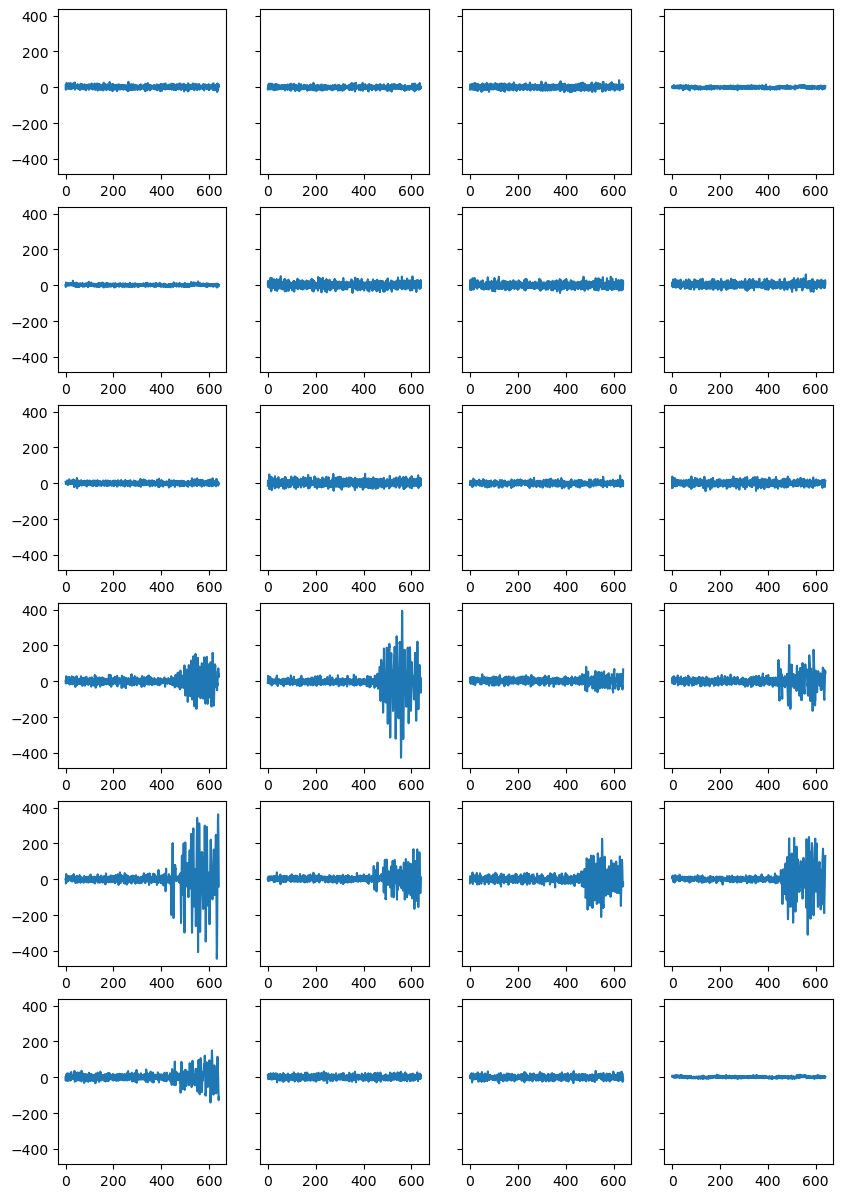

In [8]:
fmt = '%Y-%m-%d %H:%M:%S.%f'
radiant_data = np.array(file['combined/waveforms/radiant_data[24][2048]'])
#time = np.array(file['combined/header/readout_time'])
trigger_number = np.array(file['combined/header/trigger_number'])
times = np.array(file['combined/header/trigger_time'])
event_number = np.array(file['combined/header/event_number'])
station_number = np.array(file['combined/header/station_number'])
run_number = np.array(file['combined/header/run_number'])
times = pd.to_datetime(times, unit = 's')
start_time = pd.to_datetime('2023-05-12T12:40:07')
stop_time = pd.to_datetime('2023-05-12T12:46:14')

mask = (times >= start_time) & (times <= stop_time)

event_index = 5

print('event number:    ', event_number[mask][event_index])

print('station number:  ', station_number[mask][event_index])
print('run number:      ', run_number[mask][event_index])
#x = np.arange(0, 2048, 1)
x = np.linspace(0, 640, 2048) # the real time would be interesting
print(len(x))
#print(times.shape, radiant_data[0,0,:].shape, x.shape)
#print(radiant_data[mask, :, :].shape)

#print(times[mask])
fig, ax = plt.subplots(6, 4, figsize = (10, 15), sharey = True)
counter = 0
for i in range(6):
    for j in range(4):
        ax[i, j].plot(x, radiant_data[mask, :, :][event_index, counter, :])
        counter += 1

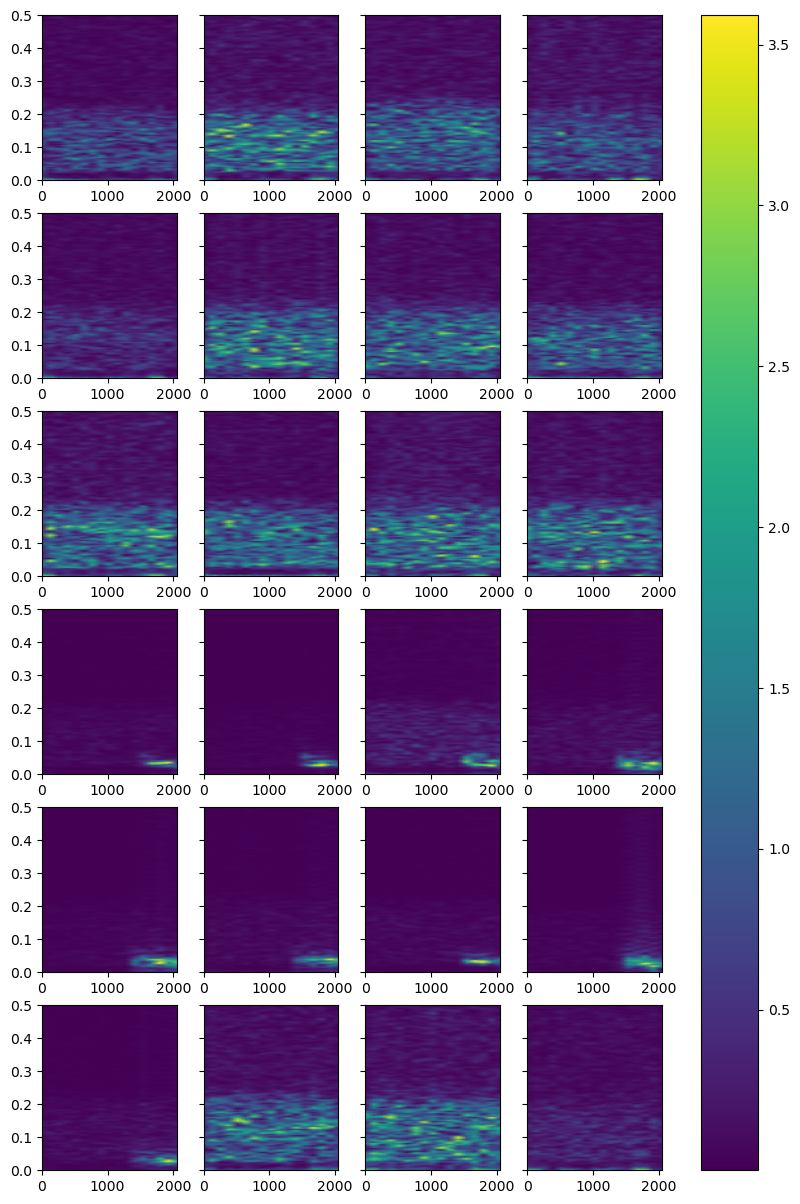

In [4]:
fig, ax = plt.subplots(6, 4, figsize = (10, 15), sharey = True)
counter = 0
for i in range(6):
    for j in range(4):
        f, t, Zxx = stft(radiant_data[mask, :, :][5, counter, :])
        im = ax[i, j].pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
        counter += 1


fig.colorbar(im, ax=ax.ravel().tolist())


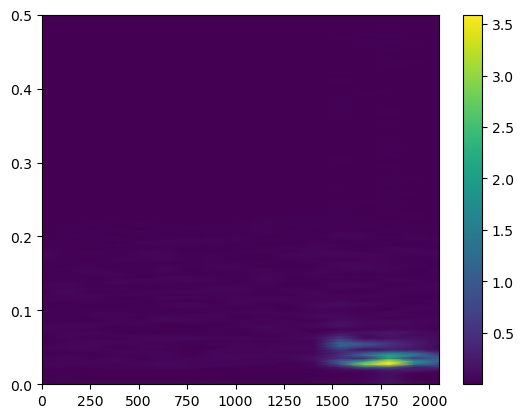

In [10]:
f, t, Zxx = stft(radiant_data[mask, :, :][5, 13, :])

fig, ax = plt.subplots()

ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

fig.colorbar(im, ax=ax)


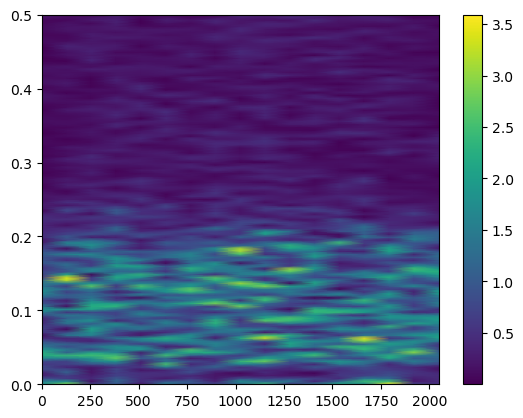

In [11]:
f, t, Zxx = stft(radiant_data[mask, :, :][5, 10, :])

fig, ax = plt.subplots()

ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

fig.colorbar(im, ax=ax)


In [ ]:
'''
import matplotlib.pyplot as plt
import numpy as np

from NuRadioReco.modules.io.rno_g import rnogDataReader
from NuRadioReco.utilities import units
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfrom NuRadioReco.modules.io.rno_g import rnogDataReader\nfrom NuRadioReco.utilities import units\n'

In [1]:
from NuRadioReco.modules.io.rno_g import rnogDataReader

ModuleNotFoundError: No module named 'NuRadioReco.modules.io.rno_g'